# In this notebook, we run an MLP model on dataset hoda and examine the results in terms of underfitting, fitting and overfitting.

## Download dataset

In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F
To: /content/dataset.py
100% 909/909 [00:00<00:00, 2.96MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi
To: /content/Data_hoda_full.mat
100% 3.99M/3.99M [00:00<00:00, 233MB/s]


## Importing libraries

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation
from dataset import load_hoda # (persian handwritten dataset)

# Load dataset

In [3]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

### Converting x_train and x_test to ndarray array format and converting y_train and y_test to one-hot-encoding:
####First, we have defined a simple function that prints the dimensions, data type and information of the loaded dataset. We will print this information before and after data preprocessing to notice the changes!

In [4]:
# Preprocess input data for Keras.
x_train = np.array(x_train_original) # Convert to numpy arrays
y_train = keras.utils.to_categorical(y_train_original, num_classes=10) # One-hot encode the labels
x_test = np.array(x_test_original) # Convert to numpy arrays
y_test = keras.utils.to_categorical(y_test_original, num_classes=10) # One-hot encode the labels

In [5]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [6]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # Normalize inputs from [0, 255] to [0, 1]
x_test /= 255 # Normalize inputs from [0, 255] to [0, 1]

In [8]:
# In this Create the model, input dim=25 and output dim = 10

##################################
# you code here
# model = Sequential()
# model.add(Dense(10, input_dim=25))
# model.add(Activation('softmax'))
##################################

model = Sequential([
    Dense(10, input_dim=25, name='layer1'),
    Activation('softmax', name='softmax_activation')
], name='hoda_model')

## we used a very simple model. Use a deeper MLP or a different type of neural network, such as a CNN may get better result.

In [9]:
model.summary() # Print a description of the model.

Model: "hoda_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                260       
                                                                 
 softmax_activation (Activa  (None, 10)                0         
 tion)                                                           
                                                                 
Total params: 260 (1.02 KB)
Trainable params: 260 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile model

In [10]:
# In this cell compile model, set loss function and optimizer and get metrics accuracy

##################################
# you code here
# loss='categorical_crossentropy' -> multiclass classification
# optimizer='adam' -> adaptive moment estimation (adam) because it's faster than sgd
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
##################################

## Fit model

In [11]:
MLP_model = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
16/16 [==============================] - 6s 15ms/step - loss: 2.4657 - accuracy: 0.1610 - val_loss: 2.5583 - val_accuracy: 0.1350
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 2.3774 - accuracy: 0.1890 - val_loss: 2.4748 - val_accuracy: 0.1500
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 2.2972 - accuracy: 0.2060 - val_loss: 2.3963 - val_accuracy: 0.1750
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 2.2226 - accuracy: 0.2250 - val_loss: 2.3225 - val_accuracy: 0.1850
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 2.1525 - accuracy: 0.2430 - val_loss: 2.2528 - val_accuracy: 0.1950
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 2.0859 - accuracy: 0.2540 - val_loss: 2.1863 - val_accuracy: 0.2100
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 2.0236 - accuracy: 0.2730 - val_loss: 2.1225 - val_accuracy: 0.2250
Epoch 8/100


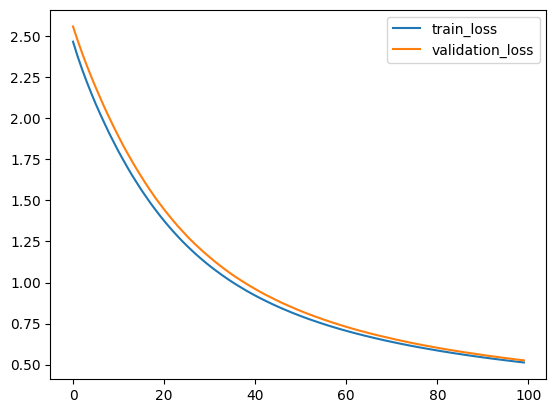

In [15]:
# plot Loss
plt.plot(MLP_model.history["loss"]) # train loss
plt.plot(MLP_model.history["val_loss"]) # validation loss
plt.legend(["train_loss", "validation_loss"])

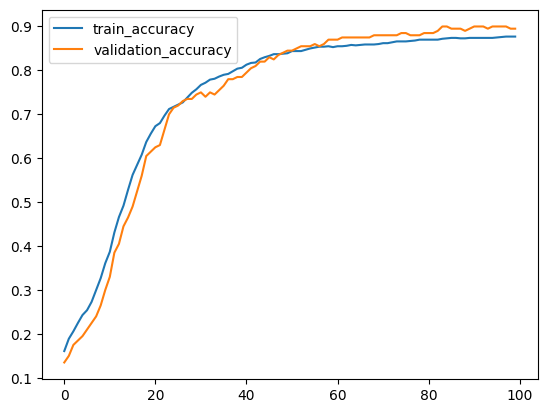

In [16]:
# plot accuracy
plt.plot(MLP_model.history["accuracy"]) # train accuracy
plt.plot(MLP_model.history["val_accuracy"]) # validation accuracy
plt.legend(["train_accuracy", "validation_accuracy"])